In [1]:
import pandas as pd
import gensim
import matplotlib.pyplot as plt

In [2]:
train_downsampled = pd.read_csv("../input/downsampled_prepped.csv")

In [3]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in train_downsampled.iterrows():
    documents.append(read_questions(row,"question_text"))

In [4]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)

In [5]:
model.build_vocab(documents)  # prepare the model vocabulary

In [6]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(8678199, 11572360)

In [7]:
len(model.wv.vocab)

31783

In [8]:
model.wv['songs']

array([ 2.00369239e-01, -1.89832672e-01, -2.24016055e-01,  4.68671918e-01,
        3.13221037e-01,  2.64346283e-02,  1.82662308e-01, -2.19005734e-01,
        2.72568837e-02,  1.28776029e-01, -1.75084114e-01,  1.26865253e-01,
        2.01909468e-01, -2.23410189e-01,  1.23816967e-01,  5.58243930e-01,
        3.19705427e-01, -9.11689997e-02,  2.13827088e-01,  4.29133922e-01,
       -3.05296272e-01,  5.38468845e-02,  4.36549872e-01, -4.64458093e-02,
       -3.09313595e-01,  2.42898956e-01,  2.38707900e-01, -5.94472401e-02,
       -5.11378683e-02,  2.28773698e-01,  2.24164695e-01, -2.64310122e-01,
        2.55960286e-01, -1.80880740e-01,  1.53983161e-01, -6.16395473e-02,
       -3.95580769e-01,  5.82085550e-02, -4.07766879e-01,  1.90375990e-03,
       -1.21195748e-01, -4.38772351e-01,  3.06970417e-01, -4.93043400e-02,
        1.27921551e-02,  1.78845823e-01, -9.68430117e-02,  1.95942312e-01,
        3.24118823e-01,  1.86294287e-01,  1.04832366e-01,  1.63912103e-01,
        7.64740258e-02, -

### We can now create a two-dimensional semantic representation of word embeddings using t-SNE.

In [9]:
word_vectors = model.wv

In [10]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'how': <gensim.models.keyedvectors.Vocab at 0x112f0190>,
 'many': <gensim.models.keyedvectors.Vocab at 0x112e8b30>,
 'songs': <gensim.models.keyedvectors.Vocab at 0x10f64fd0>,
 'did': <gensim.models.keyedvectors.Vocab at 0x3e38ab0>,
 'prince': <gensim.models.keyedvectors.Vocab at 0x10111ed0>,
 'have': <gensim.models.keyedvectors.Vocab at 0x11314170>,
 'after': <gensim.models.keyedvectors.Vocab at 0x11314290>,
 'his': <gensim.models.keyedvectors.Vocab at 0x11314810>,
 'death': <gensim.models.keyedvectors.Vocab at 0x11314350>,
 'where': <gensim.models.keyedvectors.Vocab at 0x113143d0>,
 'can': <gensim.models.keyedvectors.Vocab at 0x11314450>,
 'obtain': <gensim.models.keyedvectors.Vocab at 0x113145d0>,
 'edible': <gensim.models.keyedvectors.Vocab at 0x11314f50>,
 'seaweed': <gensim.models.keyedvectors.Vocab at 0x11314f30>,
 'that': <gensim.models.keyedvectors.Vocab at 0x11314610>,
 'tastes': <gensim.models.keyedvectors.Vocab at 0x11314f10>,
 'like': <gensim.models.keyedvectors.Vocab at 

In [11]:
from sklearn.manifold import TSNE # t-distributed Stochastic Neighbor Embedding


X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


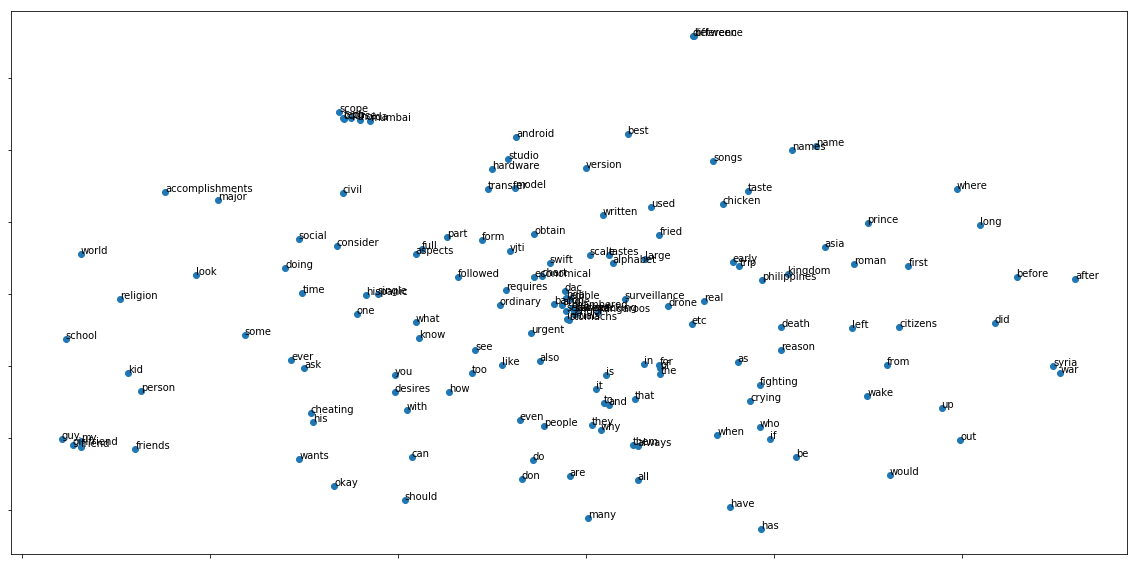

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
plt.show()

In [13]:
w1 = 'friends'
model.wv.most_similar(positive=w1, topn=5)

[('roommates', 0.7319523692131042),
 ('friend', 0.7226834893226624),
 ('psycho', 0.7223467230796814),
 ('relatives', 0.7200878262519836),
 ('colleague', 0.718452513217926)]

In [14]:
w1 = ["women","rights"]
w2 = ["girls"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

[('violations', 0.6356455683708191), ('activists', 0.5778892636299133)]

In [15]:
model.wv.doesnt_match(["government","corruption","peace"])

'peace'

In [ ]:
export_model(model, "../models/w2v_downsampling.pickle")